In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2
from tqdm import tqdm

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [153]:
path = '../images'
IMG_SIZE = 100

In [154]:
def loadingData(path):
    CATEGORIES = []
    data = []
    
    dirs = os.listdir(path)
    for file in dirs:
        CATEGORIES.append(file)

    for category in tqdm(CATEGORIES):
        localPath = os.path.join(path, category)
        for img in os.listdir(localPath):
            img_array = cv2.imread(os.path.join(localPath, img))
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            data.append([new_array, category])
    
    return data

In [155]:
data = loadingData(path)


100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


In [156]:
from sklearn.model_selection import train_test_split

def preprocessing(df):
    x = []
    y = []

    for categories, label in df:
        x.append(categories)
        y.append(label)
        
    x = np.array(x).reshape(len(x),-1)
    x = x / 255.0
        
    #split
    return train_test_split(x, y, test_size=0.33, random_state=42)

In [157]:
X_train, x_test, y_train, y_test = preprocessing(data)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [159]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 25):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]


In [160]:

for keys, values in scores.items():
    print(keys, ':', values)

1 : [1.0, 0.5897435897435898]
2 : [0.6455696202531646, 0.5641025641025641]
3 : [0.7215189873417721, 0.6923076923076923]
4 : [0.569620253164557, 0.5641025641025641]
5 : [0.6075949367088608, 0.6153846153846154]
6 : [0.5443037974683544, 0.5641025641025641]
7 : [0.5949367088607594, 0.6153846153846154]
8 : [0.5443037974683544, 0.5897435897435898]
9 : [0.5822784810126582, 0.6666666666666666]
10 : [0.4936708860759494, 0.5897435897435898]
11 : [0.5822784810126582, 0.6410256410256411]
12 : [0.5189873417721519, 0.6410256410256411]
13 : [0.569620253164557, 0.6923076923076923]
14 : [0.5569620253164557, 0.6410256410256411]
15 : [0.5316455696202531, 0.6923076923076923]
16 : [0.5189873417721519, 0.6153846153846154]
17 : [0.5063291139240507, 0.6923076923076923]
18 : [0.5063291139240507, 0.6666666666666666]
19 : [0.5569620253164557, 0.6666666666666666]
20 : [0.5063291139240507, 0.6153846153846154]
21 : [0.5569620253164557, 0.6666666666666666]
22 : [0.5063291139240507, 0.6153846153846154]
23 : [0.493670

C:\Users\mathi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


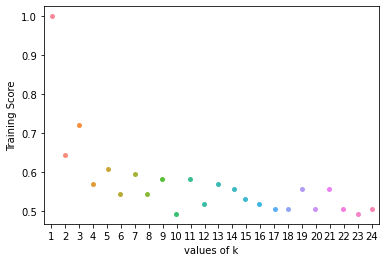

In [161]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()
# function to show plot

C:\Users\mathi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


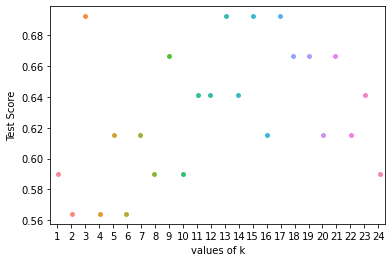

In [162]:

ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

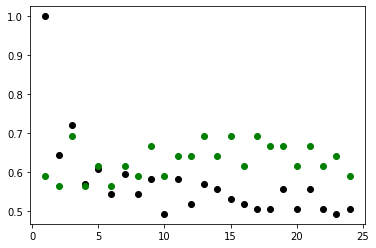

In [163]:

plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

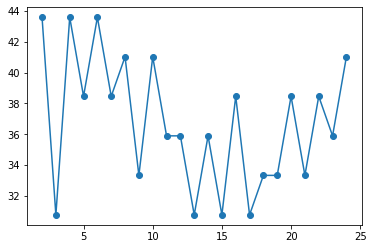

In [164]:
errors = []
for k in range(2,25):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(x_test, y_test)))
plt.plot(range(2,25), errors, 'o-')
plt.show()

In [165]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [166]:
error = 1 - knn.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.307692


In [167]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(5)
knn.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(x_test)

# On redimensionne les données sous forme d'images
images = x_test.reshape((-1, 30, 30))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

pred=knn.predict(x_test)


In [168]:
from sklearn.metrics import accuracy_score

print("Accuracy on data is",accuracy_score(y_test,pred))

Accuracy on data is 0.6153846153846154


In [169]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report is")
print(classification_report(y_test,pred))

Classification report is
                       precision    recall  f1-score   support

     Pigeon_Guillemot       0.59      0.95      0.73        21
Red_headed_Woodpecker       0.80      0.22      0.35        18

             accuracy                           0.62        39
            macro avg       0.69      0.59      0.54        39
         weighted avg       0.69      0.62      0.55        39



In [170]:
print('confusion matrix')
print(confusion_matrix(y_test, pred))

confusion matrix
[[20  1]
 [14  4]]


In [171]:
result = pd.DataFrame({'original' : y_test,'predicted' : pred})
result[:50]

,original,predicted
0,Pigeon_Guillemot,Pigeon_Guillemot
1,Red_headed_Woodpecker,Red_headed_Woodpecker
2,Pigeon_Guillemot,Pigeon_Guillemot
3,Pigeon_Guillemot,Pigeon_Guillemot
4,Pigeon_Guillemot,Pigeon_Guillemot
5,Red_headed_Woodpecker,Pigeon_Guillemot
6,Red_headed_Woodpecker,Pigeon_Guillemot
7,Pigeon_Guillemot,Pigeon_Guillemot
8,Red_headed_Woodpecker,Pigeon_Guillemot
9,Red_headed_Woodpecker,Pigeon_Guillemot


In [172]:
import pickle
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))